In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/Ovi/Desktop/499Project/dataset/ratings_Electronics (1).csv', names=['userId', 'productId','rating','timestamp'])
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [4]:
df.shape

(7824482, 4)

In [5]:
df.rating.describe()

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.drop(columns=["timestamp"], inplace=True)

In [8]:
# take 10 % of the data
df = df[:int(len(df) * .1)]
df.shape

(782448, 3)

In [9]:
# find minimum and maximum ratings
print('The minimum rating is: %d' %(df['rating'].min()))
print('The maximum rating is: %d' %(df['rating'].max()))

The minimum rating is: 1
The maximum rating is: 5


In [10]:
df.groupby('userId')['rating'].mean().sort_values(ascending=False).head(10) 

userId
A2W4G6C7I84MS9    5.0
A2XFQYEUIQXZWK    5.0
A2XFVOSBYCBXN4    5.0
A2XFVF8SAETRKN    5.0
A2XFV65NWM7LP4    5.0
A2XFTZEM2WTOH     5.0
A2XFSDDNMXVNSZ    5.0
A2XFSBG3HKMM1E    5.0
A2XFRTPZFW55F0    5.0
A2XFRJ058B6QKM    5.0
Name: rating, dtype: float64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


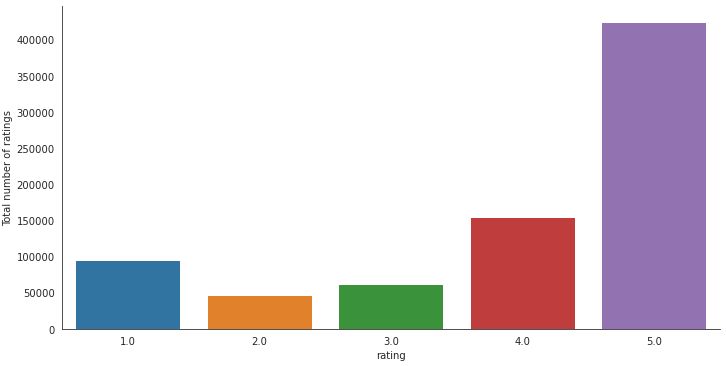

In [11]:
# check the Rating distribution in the range 1-5 for the Data given 

with sns.axes_style('white'):
    g = sns.catplot("rating", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [12]:
print("Total data ")
print("*"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.userId)))
print("Total No of products  :", len(np.unique(df.productId)))

Total data 
**************************************************

Total no of ratings : 782448
Total No of Users   : 606149
Total No of products  : 47105


In [13]:
#Keep the users where the user has rated more than 50 

counts1 = df['userId'].value_counts()
#print(counts1)
Data_new = df[df['userId'].isin(counts1[counts1 >= 50].index)]
#counts1

In [14]:
#highest rated products from the selected records. 

Data_new.groupby('productId')['rating'].mean().sort_values(ascending=False) 

productId
B000068IGI    5.0
B00006IJO4    5.0
B00006JI6T    5.0
B0001CNKCM    5.0
B000816XI4    5.0
             ... 
B00005QWZ7    1.0
B00009W5QR    1.0
B00005RKO5    1.0
B00005UV2R    1.0
1400532655    1.0
Name: rating, Length: 2207, dtype: float64

In [15]:
#Calculate the density of the rating matrix

final_ratings_matrix = Data_new.pivot(index = 'userId', columns ='productId', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (27, 2207)
given_num_of_ratings =  2550
possible_num_of_ratings =  59589
density: 4.28%


In [16]:
final_ratings_matrix.head()

productId,1400532655,B000000O48,B000001OL6,B000001OMN,B00000J05A,B00000J061,B00000J0E8,B00000J1E6,B00000J1EP,B00000J1G6,...,B000BQ57BU,B000BQ7GW8,B000BQVYIA,B000BSLTIS,B000BSLTMY,B000BSOBG0,B000BTFZZA,B000BTL0OA,B000BTPVHW,B000BTQXUG
userId,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
A1F9Z42CFF9IAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1FR68QH6Z4YZM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A11D1KHM7DVOQK,A12DLJESJKM1OQ,A149RNR5RH19YY,A1F9Z42CFF9IAY,A1FR68QH6Z4YZM,A1JWSDDIH5Z7DV,A1MJMYLRTZ76ZX,A1RPTVW5VEOSI,A203OCQQ12MAVT,A231WM2Z2JL0U3,...,A3OXHLG6DIBRW8,A5JLAU2ARJ0BO,A6FIAB28IS79,A7Y6AVS576M03,ABH9D1TEOJ56E,AGHZXQL9F94T9,AGXV8E7XK9J6H,AKT8TGIT6VVZ5,AT2J7H5TRZM8Z,AT6CZDCP4TRGA
productId,,,,,,,,,,,,,,,,,,,,,
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000000O48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000001OL6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000001OMN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000J05A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Build Popularity Recommender model=>

In [19]:
#Count of user_id for each unique product as recommendation score 
Data_new_grouped = Data_new.groupby('productId').agg({'userId': 'count'}).reset_index()
Data_new_grouped.rename(columns = {'userId': 'score'},inplace=True)
Data_new_grouped.head()

,productId,score
0,1400532655,1
1,B000000O48,1
2,B000001OL6,1
3,B000001OMN,1
4,B00000J05A,1


In [20]:
#Sort the products on recommendation score 
train_data_sort = Data_new_grouped.sort_values(['score', 'productId'], ascending = [0,1])

In [21]:
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 

In [22]:
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,productId,score,Rank
113,B00004SB92,6,1.0
1099,B00008OE6I,5,2.0
368,B00005AW1H,4,3.0
612,B0000645C9,4,4.0
976,B00007KDVI,4,5.0


In [23]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [24]:
find_recom = [15,21,53]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 15

      userId   productId  score  Rank
113       15  B00004SB92      6   1.0
1099      15  B00008OE6I      5   2.0
368       15  B00005AW1H      4   3.0
612       15  B0000645C9      4   4.0
976       15  B00007KDVI      4   5.0


Here is the recommendation for the userId: 21

      userId   productId  score  Rank
113       21  B00004SB92      6   1.0
1099      21  B00008OE6I      5   2.0
368       21  B00005AW1H      4   3.0
612       21  B0000645C9      4   4.0
976       21  B00007KDVI      4   5.0


Here is the recommendation for the userId: 53

      userId   productId  score  Rank
113       53  B00004SB92      6   1.0
1099      53  B00008OE6I      5   2.0
368       53  B00005AW1H      4   3.0
612       53  B0000645C9      4   4.0
976       53  B00007KDVI      4   5.0




<ipython-input-23-ce37e71b5ed0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recommendations['userId'] = user_id
<ipython-input-23-ce37e71b5ed0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recommendations['userId'] = user_id
<ipython-input-23-ce37e71b5ed0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

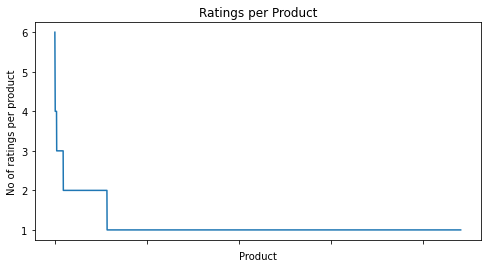

In [25]:
no_of_ratings_per_product = Data_new.groupby(by='productId')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('Ratings per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

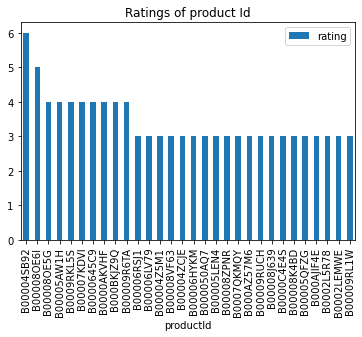

In [26]:
# Top 30 recommendations for the users

popular_products = pd.DataFrame(Data_new.groupby('productId')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar")
plt.title("Ratings of product Id")
plt.show()

In [27]:
# Split the data randomly into a train and test dataset=>

In [28]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from collections import defaultdict

In [29]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data1 = Dataset.load_from_df(Data_new,reader)
data1

In [30]:
#Splitting the dataset
trainset, testset = train_test_split(data1, test_size=0.2,random_state=123)

In [31]:
trainset.ur

defaultdict(list,
            {0: [(0, 1.0),
              (13, 4.0),
              (17, 2.0),
              (35, 5.0),
              (36, 3.0),
              (53, 3.0),
              (58, 1.0),
              (82, 5.0),
              (88, 4.0),
              (119, 3.0),
              (189, 4.0),
              (193, 3.0),
              (219, 5.0),
              (226, 1.0),
              (266, 4.0),
              (273, 4.0),
              (286, 2.0),
              (319, 2.0),
              (324, 5.0),
              (344, 1.0),
              (346, 1.0),
              (381, 3.0),
              (382, 4.0),
              (383, 2.0),
              (389, 5.0),
              (418, 5.0),
              (425, 5.0),
              (427, 4.0),
              (433, 4.0),
              (479, 2.0),
              (488, 1.0),
              (508, 3.0),
              (519, 1.0),
              (521, 2.0),
              (550, 3.0),
              (556, 4.0),
              (567, 1.0),
              (576, 3.0),
 

In [32]:
#Build Collaborative Filtering model=>

In [33]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [34]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [35]:
test_pred

[Prediction(uid='AKT8TGIT6VVZ5', iid='B00009XW3F', r_ui=5.0, est=4.155882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00005LERN', r_ui=5.0, est=4.155882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B00004U8FY', r_ui=4.0, est=4.155882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A11D1KHM7DVOQK', iid='B0001NBHMQ', r_ui=2.0, est=4.155882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1RPTVW5VEOSI', iid='B00019JPRO', r_ui=3.0, est=4.155882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2AEZQ3DGBBLPR', iid='B0000645V1', r_ui=5.0, est=4.155882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AT2J7H5TRZM8Z'

In [36]:
#Get top - K ( K = 5) recommendations=>

In [37]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [38]:
top_n = get_top_n(test_pred, n=5)
top_n

defaultdict(list,
            {'AKT8TGIT6VVZ5': [('B00007LKHY', 5),
              ('B0009R3N9E', 5),
              ('B00006I5E4', 5),
              ('B00009XW3F', 4.155882352941177),
              ('B00005LERN', 4.155882352941177)],
             'A231WM2Z2JL0U3': [('B00006HCCK', 5),
              ('B000021YUO', 4.7782338989235535),
              ('B0000AAAPF', 4.715270935960591),
              ('B00005ICE1', 4.338892983204685),
              ('B00004SCKA', 4.338892983204685)],
             'A11D1KHM7DVOQK': [('B0001NBHMQ', 4.155882352941177),
              ('B0009PUVH8', 4.155882352941177),
              ('B000092YPR', 4.155882352941177),
              ('B0002RRVQW', 4.155882352941177),
              ('B00009W3DS', 4.155882352941177)],
             'A1RPTVW5VEOSI': [('B00019JPRO', 4.155882352941177),
              ('B0001OY2VS', 4.155882352941177),
              ('B00009R6GE', 4.155882352941177),
              ('B00005NVBF', 4.155882352941177),
              ('B00004VUMI', 4.1558823529

In [39]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

AKT8TGIT6VVZ5 ['B00007LKHY', 'B0009R3N9E', 'B00006I5E4', 'B00009XW3F', 'B00005LERN']
A231WM2Z2JL0U3 ['B00006HCCK', 'B000021YUO', 'B0000AAAPF', 'B00005ICE1', 'B00004SCKA']
A11D1KHM7DVOQK ['B0001NBHMQ', 'B0009PUVH8', 'B000092YPR', 'B0002RRVQW', 'B00009W3DS']
A1RPTVW5VEOSI ['B00019JPRO', 'B0001OY2VS', 'B00009R6GE', 'B00005NVBF', 'B00004VUMI']
A2AEZQ3DGBBLPR ['B00004Y7CF', 'B00004Y2MM', 'B0000645V1', 'B000063SAT', 'B0000DKHIR']
AT2J7H5TRZM8Z ['B00005ML6P', 'B00005AUJD', 'B00005B99P', 'B0000696HN', 'B00005B9AC']
A203OCQQ12MAVT ['B0002D6QJO', 'B0002JC110', 'B0009KF9BQ', 'B0002E50MC', 'B00009R6HB']
AGHZXQL9F94T9 ['B0007XO7A4', 'B000BFNT0W', 'B0001A99MO', 'B00002EQD2', 'B0001KWGP6']
A25HBO5V8S8SEA ['B00007KDVI', 'B00005ICE3', 'B00009R6TA', 'B00005OCY6', 'B0000U1OD2']
A5JLAU2ARJ0BO ['B00008OE6I', 'B000ALAFYU', 'B000068MQE', 'B0009ST7DY', 'B0000A2QAD']
AGXV8E7XK9J6H ['B0007Y794O', 'B00009R6TA', 'B0000DZ5OE', 'B00004WCEY', 'B00007GQLS']
AT6CZDCP4TRGA ['B0001H6DL2', 'B000265GL0', 'B0007Y6ANU', 'B0

In [ ]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

In [40]:
uid = "A231WM2Z2JL0U3"  # raw user id (as in the ratings file). They are **strings**!
iid = "B00004RC2D"  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=0.0, verbose=True)

user: A231WM2Z2JL0U3 item: B00004RC2D r_ui = 0.00   est = 4.00   {'actual_k': 1, 'was_impossible': False}


In [41]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == 'A2CX7LUOHB2NDG'][['iid', 'r_ui','est']].sort_values(by = 'est',ascending = False).head(10)

,iid,r_ui,est


In [42]:
#6. Evaluate the above model=>

In [43]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0970


1.0969825605819654